<h2 class="code-line" data-line-start=0 data-line-end=1 ><a id="Notes_0"></a>Notes:</h2>
<p class="has-line-data" data-line-start="1" data-line-end="2">1.(globalactivepower*1000/60 - submetering1 - submetering2 - submetering3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.</p>
<p class="has-line-data" data-line-start="3" data-line-end="4">2.The dataset contains some missing values in the measurements (nearly 1.25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.</p>
<p class="has-line-data" data-line-start="5" data-line-end="6">Attribute Information:</p>
<p class="has-line-data" data-line-start="7" data-line-end="8">date: Date in format dd/mm/yyyy</p>
<p class="has-line-data" data-line-start="9" data-line-end="10">time: time in format hh:mm:ss</p>
<p class="has-line-data" data-line-start="11" data-line-end="12">globalactivepower: household global minute-averaged active power (in kilowatt)</p>
<p class="has-line-data" data-line-start="13" data-line-end="14">globalreactivepower: household global minute-averaged reactive power (in kilowatt)</p>
<p class="has-line-data" data-line-start="15" data-line-end="16">voltage: minute-averaged voltage (in volt)</p>
<p class="has-line-data" data-line-start="17" data-line-end="18">global_intensity: household global minute-averaged current intensity (in ampere)</p>
<p class="has-line-data" data-line-start="19" data-line-end="20">submetering1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).</p>
<p class="has-line-data" data-line-start="21" data-line-end="22">submetering2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.</p>
<p class="has-line-data" data-line-start="23" data-line-end="24">submetering3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.</p> and an air-conditioner.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

time_df = pd.read_csv(
    "individual+household+electric+power+consumption\household_power_consumption.txt",
    delimiter=';',
    dayfirst=True,
    low_memory=False,
    parse_dates={'ds': ['Date', 'Time']}
)

time_df.head()

,ds,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [2]:
print(f"These are the columns: {time_df.columns}")
print(f"This is the shape of the dataframe: {time_df.shape}")
print(f"These are the null values: {time_df.isnull().sum()}")
print(f"These are the distinct datatypes: {time_df.dtypes}")

These are the columns: Index(['ds', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')
This is the shape of the dataframe: (2075259, 8)
These are the null values: ds                           0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64
These are the distinct datatypes: ds                       datetime64[ns]
Global_active_power              object
Global_reactive_power            object
Voltage                          object
Global_intensity                 object
Sub_metering_1                   object
Sub_metering_2                   object
Sub_metering_3                  float64
dtype: object


In [3]:
# Convert numeric columns to float type
numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']
time_df[numeric_columns] = time_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

print(f"Updated Data Types: {time_df.dtypes}")

Updated Data Types: ds                       datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object


In [4]:
time_df.isnull().sum()

ds                           0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [5]:
columns_to_fill = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

for col in columns_to_fill:
    time_df[col].fillna(time_df[col].mean(), inplace=True)

time_df.isnull().sum()

ds                       0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

Using the daily sampling rate (sum), divide the data into a train and test set. The last 300 days is your test set and the first (x-300) days is your training set. Where x is the length of the dataset. Use Facebook Prophet to train a Univariate time series modeling using this time column (‘dt’ or ‘ds’) and the global_active_power (or ‘y’). 

In the last exercise, we used only the dependent variable (Global_Active_Power) and the time component for our modeling (ds vs y). Next, we will build a time series model using the other variables. These variables will be added to the forecast model as a regressor on Facebook Prophet. So the six independent variables ['Global_reactive_power', 'Voltage','Global_intensity', 'Sub_metering_1','Sub_metering_2','Sub_metering_3'] will be [‘add1’, ‘add2’, ‘add3’, ‘add4’, ‘add5’, ‘add6’] as the regressors. Split the data into train and test as done above and build a multivariate forecast model to forecast the last 300 days of the house consumption (‘global_active_power’). 

In [28]:
time_df2 = pd.read_csv(
    "individual+household+electric+power+consumption\household_power_consumption.txt",
    delimiter=';',
    dayfirst=True,
    low_memory=False,
    parse_dates={'ds': ['Date', 'Time']}
)

time_df2.head()

,ds,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [33]:
columns_to_fill = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

for col in columns_to_fill:
    time_df2[col].fillna(time_df2[col].ffill(), inplace=True)

time_df2.isnull().sum()

ds                       0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [34]:
# Pearson correlation coefficient between the global_active_power and voltage (to 3 dp)
from scipy.stats import pearsonr

correlation, p_value = pearsonr(time_df2['Global_active_power'], time_df2['Voltage'])

# Round the correlation coefficient to 3 decimal places
correlation = round(correlation, 3)

print(f"Pearson correlation coefficient between global_active_power and voltage: {correlation}")

Pearson correlation coefficient between global_active_power and voltage: -0.396


In [49]:
time_df2.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

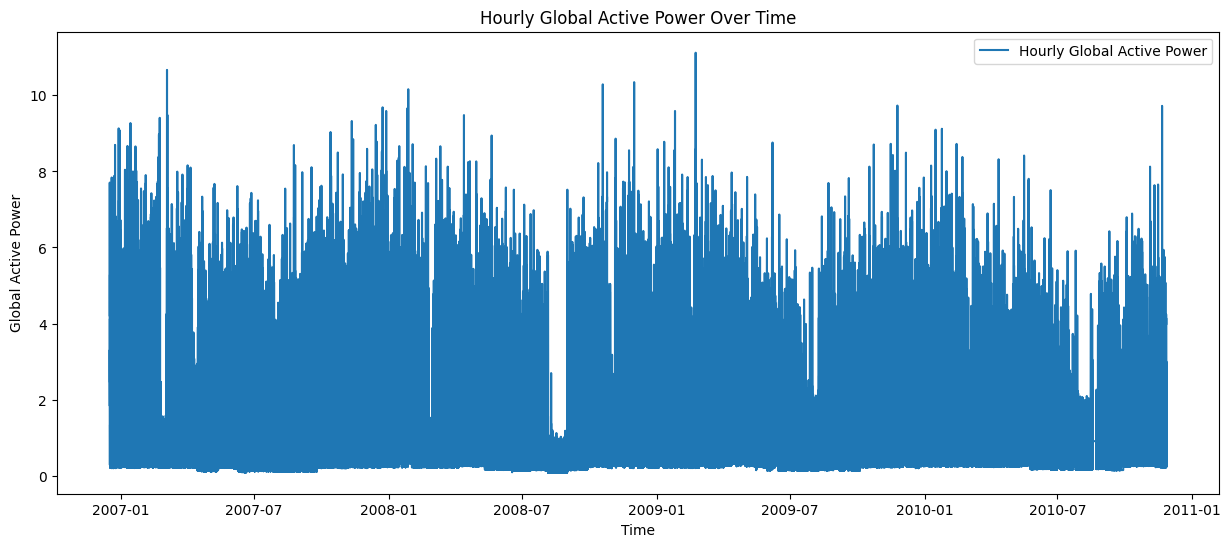

In [50]:
plt.figure(figsize=(15, 6))
plt.plot(time_df2.index, time_df2['Global_active_power'], label='Hourly Global Active Power')
plt.title('Hourly Global Active Power Over Time')
plt.xlabel('Time')
plt.ylabel('Global Active Power')
plt.legend()
plt.show()

In [35]:
# Pearson correlation coefficient between the Voltage and global_intensity (2dp)
correlation, p_value = pearsonr(time_df2['Voltage'], time_df2['Global_active_power'])

# Round the correlation coefficient to 2 decimal places
correlation = round(correlation, 2)

print(f"Pearson correlation coefficient between voltage and global_active_power: {correlation}")

Pearson correlation coefficient between voltage and global_active_power: -0.4


In [6]:
# Calculate active energy consumed every minute
time_df['active_energy'] = time_df['Global_active_power'] * 1000 / 60 - time_df['Sub_metering_1'] - time_df['Sub_metering_2'] - time_df['Sub_metering_3']

In [7]:
time_df['active_energy']

0          52.266667
1          72.333333
2          70.566667
3          71.800000
4          43.100000
             ...    
2075254    15.766667
2075255    15.733333
2075256    15.633333
2075257    15.566667
2075258    15.533333
Name: active_energy, Length: 2075259, dtype: float64

In [8]:
# Get the date and global active power columns for univariate model
univariate_df = time_df[['ds', 'Global_active_power']]
univariate_df.columns = ['ds', 'y']
print(univariate_df.columns)
print(univariate_df.ds.head())

Index(['ds', 'y'], dtype='object')
0   2006-12-16 17:24:00
1   2006-12-16 17:25:00
2   2006-12-16 17:26:00
3   2006-12-16 17:27:00
4   2006-12-16 17:28:00
Name: ds, dtype: datetime64[ns]


In [9]:
# Retrieve relevant columns for multivariate model
multivariate_df = time_df[['ds', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 
                           'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
multivariate_df.columns = ['ds', 'y', 'add1', 'add2', 'add3', 'add4', 'add5', 'add6']
print(multivariate_df.columns)
print(multivariate_df.ds.head())

Index(['ds', 'y', 'add1', 'add2', 'add3', 'add4', 'add5', 'add6'], dtype='object')
0   2006-12-16 17:24:00
1   2006-12-16 17:25:00
2   2006-12-16 17:26:00
3   2006-12-16 17:27:00
4   2006-12-16 17:28:00
Name: ds, dtype: datetime64[ns]


In [10]:
# Train-test split for both "uni/multi"-variate models
train_univariate = univariate_df.iloc[:-300]
test_univariate = univariate_df.iloc[-300:]

train_multivariate = multivariate_df.iloc[:-300]
test_multivariate = multivariate_df.iloc[-300:]

print(train_univariate.columns)
print(test_univariate.columns)
print(train_multivariate.columns)
print(test_multivariate.columns)

Index(['ds', 'y'], dtype='object')
Index(['ds', 'y'], dtype='object')
Index(['ds', 'y', 'add1', 'add2', 'add3', 'add4', 'add5', 'add6'], dtype='object')
Index(['ds', 'y', 'add1', 'add2', 'add3', 'add4', 'add5', 'add6'], dtype='object')


In [11]:
from prophet import Prophet

In [12]:
# Univariate Forecasting with Facebook Prophet
model_univariate = Prophet(uncertainty_samples=100)
model_univariate.fit(train_univariate)
future_univariate = model_univariate.make_future_dataframe(periods=300, freq='D')
forecast_univariate = model_univariate.predict(future_univariate)

23:35:06 - cmdstanpy - INFO - Chain [1] start processing
23:53:49 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
print(forecast_univariate[['yhat_lower', 'yhat_upper']].tail(300))

         yhat_lower  yhat_upper
2074959    0.072949    2.392563
2074960    0.025099    2.443889
2074961   -0.027582    2.212367
2074962   -0.082074    2.357702
2074963   -0.166553    2.022393
...             ...         ...
2075254   -2.279697    3.597546
2075255   -2.018841    3.273148
2075256   -2.136181    2.866095
2075257   -2.232936    3.154154
2075258   -2.545178    3.382924

[300 rows x 2 columns]


In [16]:
# Multivariate Forecasting with Facebook Prophet
model_multivariate = Prophet(uncertainty_samples=100)
for col in ['add1', 'add2', 'add3', 'add4', 'add5', 'add6']:
    model_multivariate.add_regressor(col)
model_multivariate.fit(train_multivariate)
future_multivariate = model_multivariate.make_future_dataframe(periods=300, freq='D')
future_multivariate[['add1', 'add2', 'add3', 'add4', 'add5', 'add6']] = multivariate_df[['add1', 'add2', 'add3', 'add4', 'add5', 'add6']]
forecast_multivariate = model_multivariate.predict(future_multivariate)

00:12:35 - cmdstanpy - INFO - Chain [1] start processing
00:45:55 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
print(forecast_multivariate[['yhat_lower', 'yhat_upper']].tail(300))

         yhat_lower  yhat_upper
2074959    0.339001    0.421717
2074960    0.317772    0.423962
2074961    0.329086    0.424964
2074962    0.499340    0.595913
2074963    0.446546    0.547557
...             ...         ...
2075254    0.804734    1.046882
2075255    0.789275    1.076864
2075256    0.739368    1.033823
2075257    0.738506    1.040250
2075258    0.761104    1.043608

[300 rows x 2 columns]


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [22]:
# Univariate Model Evaluation
actual_values_univariate = test_univariate['y'].values
predicted_values_univariate = forecast_univariate['yhat'].values[:300]

mae_univariate = mean_absolute_error(actual_values_univariate, predicted_values_univariate)
mse_univariate = mean_squared_error(actual_values_univariate, predicted_values_univariate)
rmse_univariate = sqrt(mse_univariate)

print(f'Univariate Model - MAE: {mae_univariate:.2f}, MSE: {mse_univariate:.2f}, RMSE: {rmse_univariate:.2f}')

Univariate Model - MAE: 1.04, MSE: 1.26, RMSE: 1.12


In [25]:
# Multivariate Model Evaluation
actual_values_multivariate = test_multivariate['y'].values
predicted_values_multivariate = forecast_multivariate['yhat'].values[:300]

mae_multivariate = mean_absolute_error(actual_values_multivariate, predicted_values_multivariate)
mse_multivariate = mean_squared_error(actual_values_multivariate, predicted_values_multivariate)
rmse_multivariate = sqrt(mse_multivariate)
print(f'Multivariate Model - MAE: {mae_multivariate:.2f}, MSE: {mse_multivariate:.2f}, RMSE: {rmse_multivariate:.2f}')

Multivariate Model - MAE: 2.01, MSE: 5.08, RMSE: 2.25


In [31]:
numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']
time_df2[numeric_columns] = time_df2[numeric_columns].apply(pd.to_numeric, errors='coerce')

print(f"Updated Data Types: {time_df2.dtypes}")

Updated Data Types: ds                       datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object


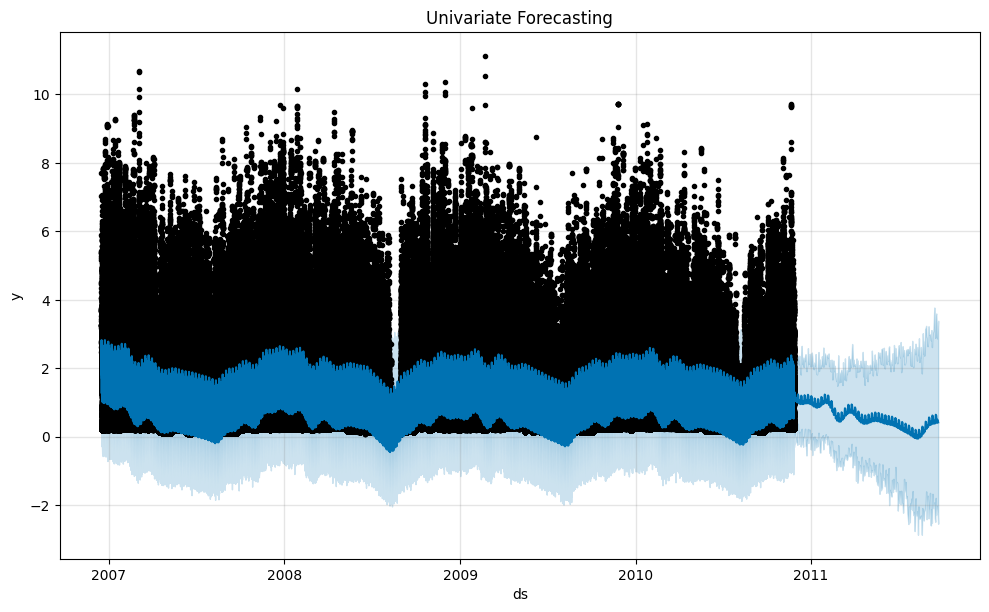

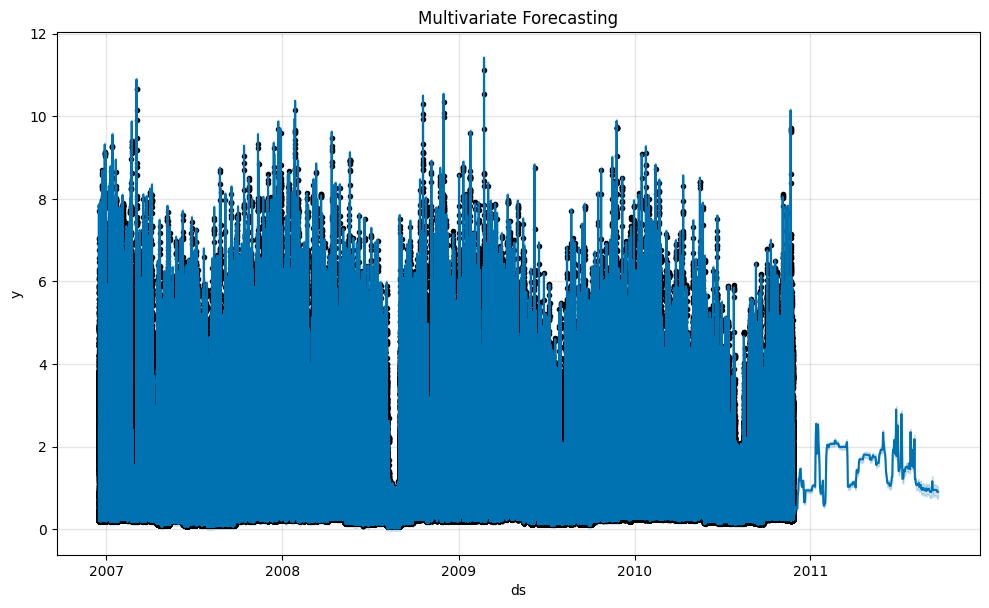

In [27]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Plotting the results for better visual understanding
fig_univariate = model_univariate.plot(forecast_univariate)
plt.title('Univariate Forecasting')

fig_multivariate = model_multivariate.plot(forecast_multivariate)
plt.title('Multivariate Forecasting')

plt.show()